In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.filters  import threshold_otsu
from skimage import measure
import matplotlib.image as img
from skimage.morphology import disk
import skimage.morphology as morph

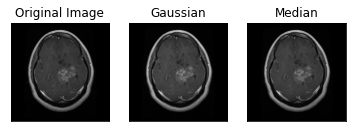

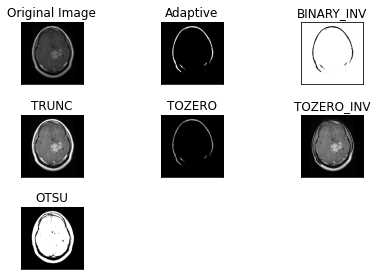

In [3]:

DATADIR = "C:/Users/rohan/Downloads/archive/kaggle/input/brain-tumor-classification-mri/Training"

CATEGORIES = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),0)  

        # equ = cv2.equalizeHist(img_array)
        # titles = ['Original Image', 'Hist']
        # images = [img_array, equ]
        # for i in range(2):
        #     plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
        #     plt.title(titles[i])
        #     plt.xticks([]),plt.yticks([])
        # plt.show()
        # img_array = equ

        gnoise = cv2.GaussianBlur(img_array,(5,5),1)
        mednoise = cv2.medianBlur(img_array, 3)

        titles = ['Original Image', 'Gaussian', 'Median']
        images = [img_array, gnoise, mednoise]

        for i in range(3):
            plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
            plt.title(titles[i])
            plt.xticks([]),plt.yticks([])
        plt.show()

        img_array = mednoise

        ret,thresh1 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
        ret,thresh2 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY_INV)
        ret,thresh3 = cv2.threshold(img_array,127,255,cv2.THRESH_TRUNC)
        ret,thresh4 = cv2.threshold(img_array,127,255,cv2.THRESH_TOZERO)
        ret,thresh5 = cv2.threshold(img_array,127,255,cv2.THRESH_TOZERO_INV)
        ret,thresh6 = cv2.threshold(img_array,200,255,cv2.THRESH_OTSU)
        titles = ['Original Image','Adaptive','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','OTSU']
        images = [img_array, thresh1, thresh2, thresh3, thresh4, thresh5,thresh6]

        for i in range(7):
            plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
            plt.title(titles[i])
            plt.xticks([]),plt.yticks([])
        plt.tight_layout()

        thresh = thresh5
        break  
    break 

dim= (512, 512)


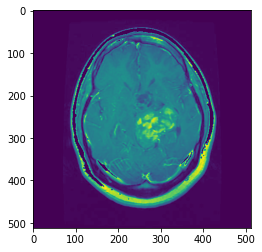

In [4]:
dimn=thresh.shape
print('dim=',dimn)
plt.figure(1)
plt.imshow(thresh)

Threshold  =  31


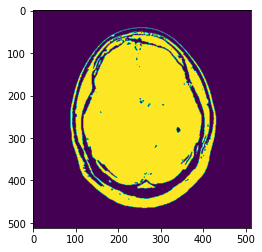

In [5]:
th=threshold_otsu(thresh)
print('Threshold  = ',th)
# Binarize using threshold th
binim1=thresh>th
plt.figure(2)
plt.imshow(binim1)

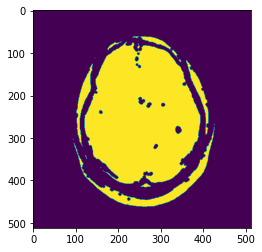

In [6]:
eroded_image = morph.erosion(binim1,disk(3))
plt.figure(3)
plt.imshow(eroded_image)

Number of regions= 20


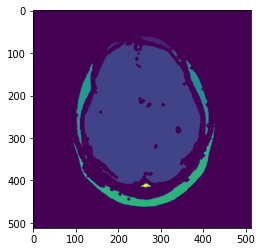

In [7]:
labelimg=measure.label(eroded_image,background=0)
plt.figure(4)
plt.imshow(labelimg)

prop=measure.regionprops(labelimg)

ncount=len(prop)
print ( 'Number of regions=',ncount)

max area= 65845 arg max= 3
values= [36, 676, 137, 65845, 31, 80, 2, 1, 19, 1677, 1998, 3, 6131, 2, 1, 11, 2, 4, 1, 119]


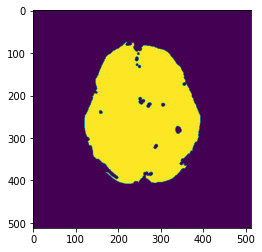

In [8]:
# Find the LLC index
argmax=0
maxarea=0
#Find the largets connected region
for i in range(ncount):
    if(prop[i].area >maxarea):
      maxarea=prop[i].area
      argmax=i
print('max area=',maxarea,'arg max=',argmax)

print('values=',[region.area for region in prop])

bmask=np.zeros(thresh.shape,dtype=np.uint8)

bmask[labelimg == (argmax+1)] =1


plt.figure(5)
plt.imshow(bmask)

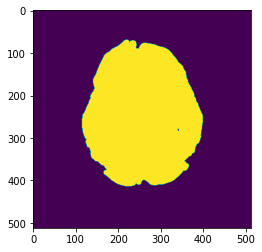

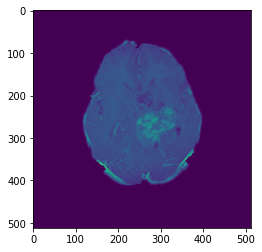

In [9]:
#Dilate the isolated region to recover the pixels lost in erosion
dilated_mask=morph.dilation(bmask,disk(6))
plt.figure(6)
plt.imshow(dilated_mask)

brain=img_array*dilated_mask
plt.figure(7)
plt.imshow(brain)

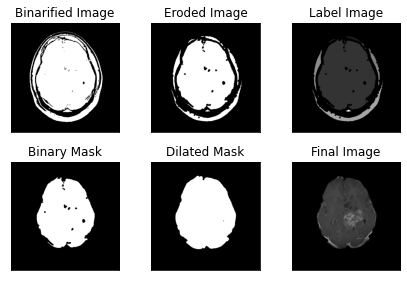

In [10]:
ims = [binim1, eroded_image, labelimg, bmask, dilated_mask, brain]
tils = ['Binarified Image', 'Eroded Image', 'Label Image', 'Binary Mask', 'Dilated Mask', 'Final Image']
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(ims[i],'gray')
    plt.title(tils[i])
    plt.xticks([]),plt.yticks([])
plt.tight_layout()

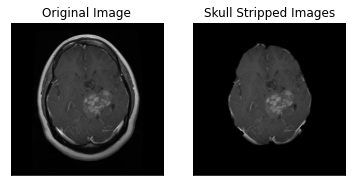

In [11]:
t = ['Original Image', 'Skull Stripped Images']
im = [img_array, brain]

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(im[i],'gray')
    plt.title(t[i])
    plt.xticks([]),plt.yticks([])
plt.show()